# Reconocimiento Facial con Machine Learning para Seguridad

En este proyecto se desarrolla un sistema de reconocimiento facial basado en modelos de *machine learning*, cuyo objetivo es identificar personas autorizadas en un entorno de seguridad utilizando cámaras que capturan imágenes en tiempo real. El sistema tomará los frames capturados por las cámaras de vigilancia y los procesará mediante un algoritmo de clasificación que determina si la persona detectada pertenece al conjunto de individuos autorizados o no.

Adicionalmente, se busca extender el análisis para identificar el género de la persona, con el propósito de enriquecer la información capturada por el sistema de seguridad. Esta característica puede ser utilizada como una capa adicional de validación o para realizar estadísticas de acceso por género, según las necesidades del sistema.

## Dataset Utilizado: Labeled Faces in the Wild (LFW)

Para entrenar el modelo se utilizará el dataset **Labeled Faces in the Wild (LFW)**, una base de datos ampliamente utilizada para el estudio del reconocimiento facial en condiciones no controladas (*in the wild*). Este conjunto fue creado y es mantenido por investigadores de la Universidad de Massachusetts, Amherst.

El dataset contiene un total de **13,233 imágenes** de rostros de **5,749 personas**, detectadas y centradas utilizando el detector de rostros de Viola-Jones. Las imágenes fueron recolectadas de la web, y representan variaciones reales de expresión facial, iluminación, pose, edad y fondo.

De las personas incluidas, **1,680** tienen dos o más imágenes distintas en el conjunto, lo cual permite realizar tareas de entrenamiento y validación más efectivas para problemas de clasificación facial.

Las imágenes están disponibles en color y tienen un tamaño de **250x250 píxeles**. Cada una viene etiquetada con el nombre de la persona, aunque el dataset **no incluye información de género**, por lo que será necesario añadir esta información manualmente o mediante alguna fuente auxiliar para tareas de clasificación de género.

Este notebook se basa en el ejemplo oficial de Scikit-learn: [Face recognition example](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html), al cual se le añaden mejoras y adaptaciones para cumplir con los objetivos del sistema de seguridad.

### Acceso al Dataset

El dataset puede ser accedido de dos formas. Ya sea directamente desde **scikit-learn**, utilizando la función:

  ```python
  from sklearn.datasets import fetch_lfw_people
  lfw_people = fetch_lfw_people()
  ```

Esta opción permite cargar automáticamente las imágenes y etiquetas con un formato listo para usar en modelos de aprendizaje automático.

O bien puede descargarse desde Kaggle, en el siguiente enlace: https://kaggle.com/datasets/jessicali9530/lfw-dataset

Esta versión contiene las imágenes originales organizadas en carpetas por nombre, útil para procesamiento personalizado o entrenamiento con redes neuronales convolucionales más complejas.

# Reconocimiento Facial con Machine Learning para Seguridad

En este proyecto se desarrolla un sistema de **reconocimiento facial** basado en modelos de *machine learning*, cuyo objetivo es identificar **personas autorizadas** en un entorno de seguridad utilizando **cámaras de videovigilancia** que capturan imágenes en tiempo real.

El sistema esta pensado para procesar cada frame capturado por las cámaras y mediante un algoritmo de **clasificación de rostros**, determinando si la persona detectada pertenece al grupo de individuos autorizados o no.

Adicionalmente, se busca extender el análisis para **identificar el género** de la persona, enriqueciendo así la información registrada por el sistema. Esta característica puede utilizarse como:
- Capa adicional de validación de identidad,
- Generación de estadísticas de acceso,
- O implementación de políticas específicas basadas en demografía.

## Objetivo

- Desarrollar un sistema de **identificación facial automática** para controlar el acceso a zonas seguras.
- Clasificar los rostros capturados no solo por identidad, sino también por **género**.
- Crear un pipeline replicable que pueda escalarse o adaptarse a otros sistemas de videovigilancia.

## Alcance del Proyecto

- Entrenamiento de modelos de reconocimiento facial supervisado.
- Evaluación de métricas de desempeño (accuracy, precision, recall).

## Uso Comercial

Este tipo de tecnología es actualmente utilizada en el mercado por empresas como:
- **Verisure**: Sistemas de alarma con reconocimiento facial para control de acceso y activación automática.
- **ADT**: Soluciones de videovigilancia avanzada que incorporan tecnologías de identificación de personas.

## Dataset Utilizado: Labeled Faces in the Wild (LFW)

Para entrenar el modelo se utilizará el dataset **Labeled Faces in the Wild (LFW)**, una base de datos ampliamente utilizada para el estudio de técnicas de reconocimiento facial en condiciones reales (*in the wild*).

Características principales del dataset:

- **Número total de imágenes**: 13,233 rostros.
- **Número de personas**: 5,749 individuos únicos.
- **Personas con 2 o más imágenes**: 1,680 personas.
- **Tamaño original de las imágenes**: 250 × 250 píxeles (ajustable).
- **Fuente de imágenes**: Fotografías reales recolectadas de internet.
- **Detección de rostros**: Utiliza el detector de Viola-Jones para centrar las caras.
- **Etiquetas**: Cada imagen está etiquetada con el nombre de la persona correspondiente.

> **Nota**: El dataset **no incluye información de género**; esta deberá ser añadida manualmente si se desea realizar una clasificación de género.

### Acceso al Dataset

El dataset puede ser accedido de dos maneras:

1. Desde `scikit-learn` (recomendado para prototipos)

    ```python
    from sklearn.datasets import fetch_lfw_people
    lfw_people = fetch_lfw_people()
    ```
    Esto descarga y organiza automáticamente las imágenes en un formato adecuado para modelos de machine learning.

2. Desde Kaggle

    Se puede descargar la versión completa del dataset desde el siguiente enlace:

    👉 [Dataset LFW en Kaggle](https://www.kaggle.com/datasets/jessicali9530/lfw-dataset)

    Esta versión organiza las imágenes en carpetas por nombre de persona, lo que facilita su uso para arquitecturas más complejas como **redes neuronales convolucionales (CNNs)**.

### Basado en ejemplo oficial

Este proyecto se inspira en el ejemplo de reconocimiento facial disponible en la documentación de **scikit-learn**:

👉 [Face recognition example (Scikit-learn)](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html)

Con mejoras, adaptaciones y extensión hacia la **clasificación de género** y aplicación en **contextos reales de seguridad**.

Para este trabajo se tomarán los datos extraidos directamente desde la librería, ya que vienen preparados para su uso.

In [2]:
# Importación de librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wikipedia as wiki
import statistics as stats
import os
import time
from sklearn.datasets import fetch_lfw_people
from collections import Counter

In [ ]:
# Cargar el dataset (personas con al menos 70 imágenes para mantener equilibrio en las clases)
lfw_people = fetch_lfw_people()

## EDA: Exploratory Data Analysis

El primer paso a llevar a cabo es explorar los datos provenientes del dataset para determinar qué tipo de información posee. Dado que el dataset está pensado para entrenar modelos de clasificación o *clustering*, no posee algunos de los métodos más comunes de analisis preliminar de datos, tales como `head()`, `info()` o `describe()`.

Por lo tanto, estaremos tomando la [documentación oficial](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) de `fetch_lfw_people` de scikit-learn como referencia. La misma describe el dataset, los datos que posee y el formato de los mismos.

### Descripción del Dataset

El dataset **Labeled Faces in the Wild (LFW)** es una colección de imágenes de rostros diseñada para el estudio del reconocimiento facial en condiciones no controladas. Cuando se carga utilizando `fetch_lfw_people`, el dataset es devuelto como un objeto tipo **Bunch**, similar a un diccionario, que contiene los siguientes atributos:

| Atributo | Forma | Descripción |
|:---------|:------|:------------|
| **`data`** | `(13233, 2914)` | Matriz donde cada fila representa una imagen de rostro aplanada (flattened). Cada imagen original es de tamaño `62 × 47` píxeles. Cambiar `resize` o `slice_` afecta esta dimensión. |
| **`images`** | `(13233, 62, 47)` | Array de imágenes originales. Cada entrada corresponde a un rostro asociado a una de las 5749 personas del dataset. |
| **`target`** | `(13233,)` | Array de etiquetas asociadas a cada imagen. Los valores de `target` son enteros en el rango `[0, 5748]`, representando el ID de cada persona. |
| **`target_names`** | `(5749,)` | Array de strings con los nombres de todas las personas en el dataset. La posición en este array corresponde al ID utilizado en `target`. |
| **`DESCR`** | `str` | Descripción completa del dataset LFW. |

### Salida alternativa (`return_X_y=True`)

Si se establece `return_X_y=True` al cargar el dataset, se devuelve una **tupla** `(data, target)`:

- **`data`**: Matriz 2D de tamaño `(n_samples, n_features)`, donde cada fila representa una muestra (imagen aplanada).
- **`target`**: Array de tamaño `(n_samples,)`, conteniendo las etiquetas asociadas a cada imagen.

### Exploración del Formato

Para verificar el formato de los datos, se tomará el dataset ya descargado y se extraerán los principales sets de datos, guardandolos en variables dentro del *script*.

In [ ]:
# Extraer las dimensiones principales del dataset:
# - n_samples: cantidad total de imágenes disponibles
# - h, w: altura y ancho de cada imagen en píxeles
n_samples, h, w = lfw_people.images.shape

# Obtener la matriz de datos:
# Cada fila de X representa una imagen aplanada en un vector de características
X = lfw_people.data      

# Obtener las etiquetas:
# Cada elemento de y es un índice numérico que representa a una persona
y = lfw_people.target    

# Obtener los nombres de las personas:
# target_names es un arreglo que contiene el nombre real asociado a cada índice
target_names = lfw_people.target_names

# Calcular el número de clases únicas (personas distintas) en el dataset
n_classes = target_names.shape[0]

# Mostrar información básica sobre el dataset
print(f"Número de imágenes: {n_samples}")
print(f"Dimensiones de cada imagen: {h} x {w}")
print(f"Número de clases (personas): {n_classes}")
print(f"Personas en el dataset: {target_names}")

Número de imágenes: 13233
Dimensiones de cada imagen: 62 x 47
Número de clases (personas): 5749
Personas en el dataset: ['AJ Cook' 'AJ Lamas' 'Aaron Eckhart' ... 'Zumrati Juma' 'Zurab Tsereteli'
 'Zydrunas Ilgauskas']


Para entender un poco mejor el dataset, vamos a imprimir algunas de las imagenes junto con el nombre del rotro que se encuentra en la misma.

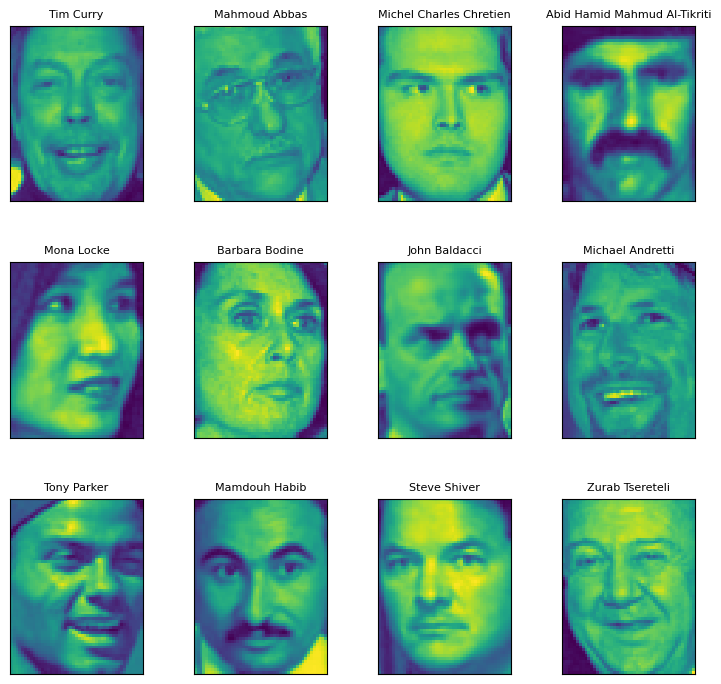

In [ ]:
# Función para visualizar una galería de imágenes
# images: conjunto de imágenes a mostrar
# titles: títulos asociados a cada imagen (nombre de la persona)
# h, w: dimensiones (altura, ancho) de cada imagen
# n_row, n_col: cantidad de filas y columnas en la grilla de visualización
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))  # Definir tamaño de la figura
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)  # Espaciado entre imágenes
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)  # Crear cada subgráfico
        plt.imshow(images[i], interpolation='nearest')  # Mostrar imagen
        plt.title(titles[i], size=8)  # Mostrar título (nombre reducido)
        plt.xticks(())  # Quitar marcas de eje x
        plt.yticks(())  # Quitar marcas de eje y

# Generar títulos con los nombres de las personas
titles = [target_names[y[i]] for i in range(12)]

# Llamar a la función para mostrar las primeras 12 imágenes
plot_gallery(lfw_people.images, titles, h, w)

# Mostrar la galería de imágenes
plt.show()

Algo importante a notar, es que el dataset está armado como si fuera una base de datos relacional. Es decir, cada imagen posee un *label* numérico que se corresponde al ID del nombre de una persona dentro del dataset. Esto se debe a que si bien hay 13233 imágenes, sólo son 5749 personas, por lo que sus IDs van a estar repetidos más de una vez dentro del conjunto de datos **`y`**. Dentro del conjunto de datos **`target_names`** tenemos la relación entre cada ID y su respectivo nombre.

### Agregado de datos usando la API de Wikipedia

Para cumplir con el objetivo de clasificar a las personas por genero, se deben generar los labels de género de cada una de estas personas y asociarlas a cada una de sus imágenes.

Con este fin, inicialmente se tomará el conjunto de datos **`target_names`** y se lo convertirá a formato **dataframe**. Se guardarán los datos en formato **CSV** para revisar los mismos de manera manual.

In [ ]:
# Crear un DataFrame solo con los nombres únicos
target_names_df = pd.DataFrame({
    'Label_ID': range(len(target_names)),  # ID numérico (posición en el array)
    'Label_Name': target_names             # Nombre de la persona
})

# Guardar el DataFrame en un archivo CSV
target_names_df.to_csv('lfw_target_names.csv', index=False)

print("Archivo 'lfw_target_names.csv' creado exitosamente.")

Archivo 'lfw_target_names.csv' creado exitosamente.


El siguiente paso será utilizar la API de Wikipedia para determinar los géneros de cada una de las personas en el dataset.
Dado que cada persona en el dataset es una personalidad conocida, se asume que posee una página de Wikipedia propia.

Wikipedia posee una API propia que es una interfaz que permite consultar información de Wikipedia de forma automática, sin necesidad de abrir el navegador manualmente. Funciona mediante peticiones HTTP (normalmente `GET` o `POST`) que devuelven los datos en formatos como **JSON** o **XML**. En otras palabras, es como hablar directamente con Wikipedia a través de código, enviando una "pregunta estructurada" y recibiendo una "respuesta organizada" con la información solicitada.

Para poder hacer uso de esta API existe una librería de Python llamada **`wikipedia`**, que actúa como un "cliente" para la API de Wikipedia. Esta librería permite:

- **Crea automáticamente** las peticiones HTTP correctas.
- **Maneja** errores como ambigüedad o páginas no encontradas.
- **Devuelve** la información de Wikipedia en objetos Python fáciles de usar (por ejemplo, el título, el contenido o la URL del artículo).

Por ejemplo, con una sola línea:

```python
page = wikipedia.page('Barack Obama')
```

Se hace internamente toda la conexión a la API y se recupera el contenido completo de la página de Barack Obama, listo para ser utilizado en el *script*.

A continuación se crea una función denominada `detect_gender_with_wikiapi()` que busca un determinado nombre y se encarga de obtener párrafo de la descripción general de la página de wikipedia de la persona en cuestión, y determina si el género de dicha persona es **Male** o **Female** en base a los pronombres usados. Si se utilizar "*he*" , entonces se asume que la persona es **Male**. Si por el contrario el pronombre para describir a la persona es "*she*", se asume que es **Female**. Si ninguno de los dos pronombres está presente, se determina que el género es **Unknown**.

Esta función requiere de **104 minutos** para ejecutarse y completar la columna **Gender**.

In [6]:
# Función para detectar el género leyendo toda la introducción de la biografía
def detect_gender_with_wikiapi(name):
    try:
        # Buscar la página de Wikipedia más relevante para ese nombre
        page = wiki.page(name, auto_suggest=False)

        # Obtener todo el contenido de la página
        content = page.content

        # Extraer la introducción: tomamos todo hasta la primera sección importante
        intro_end_idx = content.find('\n==')
        if intro_end_idx != -1:
            intro = content[:intro_end_idx]
        else:
            intro = content  # Si no hay secciones, usamos todo el contenido

        intro_lower = intro.lower()

        # Detectar género buscando pronombres en la introducción
        if ' he ' in intro_lower:
            return 'Male'
        elif ' she ' in intro_lower:
            return 'Female'
        else:
            return 'Unknown'
    except Exception as e:
        # Si ocurre un error (página no encontrada, ambigüedad, etc.)
        return 'Unknown'

# Cargar o crear el CSV
csv_path = 'lfw_target_names_and_gender.csv'

if os.path.exists(csv_path):
    print("Archivo existente encontrado. Cargando...")
    target_names_df = pd.read_csv(csv_path)
else:
    print("Archivo no encontrado. Creando nuevo...")
    target_names_df = pd.DataFrame({
        'Label_ID': range(len(target_names)),  # Asume que 'target_names' está cargado
        'Label_Name': target_names,
        'Gender': ['Unknown'] * len(target_names)
    })
    target_names_df.to_csv(csv_path, index=False)
    print("Archivo creado exitosamente.")

# Detectar género en nombres faltantes
counter = 0

for idx, row in target_names_df.iterrows():
    if row['Gender'] == 'Unknown':
        name = row['Label_Name']
        gender = detect_gender_with_wikiapi(name)
        target_names_df.at[idx, 'Gender'] = gender
        counter += 1

        # Mostrar progreso
        print(f"[{idx}] {name} → {gender}")

        # Cada 100 nombres guardamos avance
        if counter % 100 == 0:
            target_names_df.to_csv(csv_path, index=False)
            print(f"Avance guardado después de {counter} nombres.")

        # Pausa entre consultas para evitar bloqueo por parte de Wikipedia
        time.sleep(0.75)

# Guardar definitivamente el archivo
target_names_df.to_csv(csv_path, index=False)
print("Archivo final actualizado y guardado correctamente.")

Archivo existente encontrado. Cargando...
[1] AJ Lamas → Unknown
[2] Aaron Eckhart → Male
[3] Aaron Guiel → Male
[4] Aaron Patterson → Unknown
[7] Aaron Sorkin → Male
[8] Aaron Tippin → Male
[9] Abba Eban → Male
[10] Abbas Kiarostami → Male
[11] Abdel Aziz Al-Hakim → Unknown
[12] Abdel Madi Shabneh → Unknown
[13] Abdel Nasser Assidi → Unknown
[15] Abdul Majeed Shobokshi → Unknown
[16] Abdul Rahman → Unknown
[17] Abdulaziz Kamilov → Male


d:\face_recognition_classifier\env\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file d:\face_recognition_classifier\env\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


[18] Abdullah → Unknown
[21] Abdullah Nasseef → Male
[22] Abdullah al-Attiyah → Unknown
[24] Abel Aguilar → Male
[25] Abel Pacheco → Male
[26] Abid Hamid Mahmud Al-Tikriti → Unknown
[27] Abner Martinez → Unknown
[28] Abraham Foxman → Male
[29] Aby Har-Even → Unknown
[30] Adam Ant → Male
[31] Adam Freier → Male
[33] Adam Kennedy → Male
[36] Adam Sandler → Male
[39] Adelina Avila → Unknown
[40] Adisai Bodharamik → Unknown
[41] Adolfo Aguilar Zinser → Male
[42] Adolfo Rodriguez Saa → Male
[43] Adoor Gopalakarishnan → Unknown
[44] Adrian Annus → Unknown
[45] Adrian Fernandez → Unknown
[48] Adrian Nastase → Male
[50] Adriana Perez Navarro → Unknown
[51] Adrianna Zuzic → Unknown
[52] Adrien Brody → Male
[53] Afton Smith → Unknown
[55] Agnelo Queiroz → Male
[56] Agnes Bruckner → Female
[57] Ahmad Jbarah → Unknown
[58] Ahmad Masood → Unknown
[59] Ahmed Ahmed → Unknown
[61] Ahmed Ghazi → Unknown
[63] Ahmed Lopez → Male
[64] Ahmed Qureia → Male
[65] Ahmet Demir → Unknown
[68] Aicha El Ouafi → Un

Una vez que ejecutada la función debemos verificar la efectividad de la misma, por lo que se imprimirán las cantidades obtenidas en cada caso.

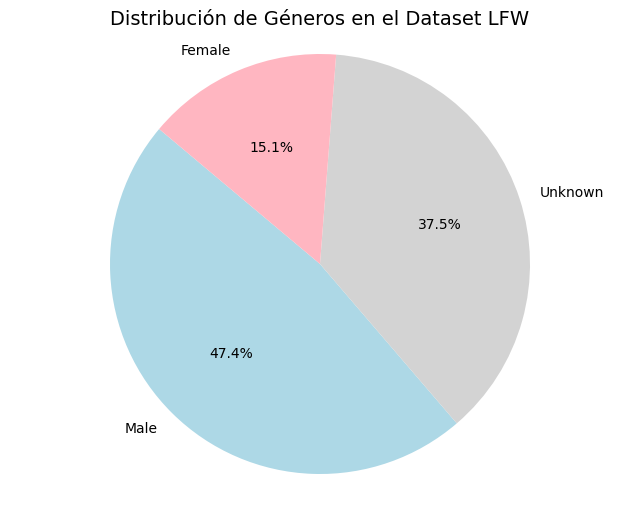

In [10]:
# Cargar el archivo CSV con los nombres y géneros
df = pd.read_csv('lfw_target_names_and_gender.csv')

# Contar la cantidad de ocurrencias de cada género
gender_counts = df['Gender'].value_counts()

# Definir los colores según el género
color_mapping = {
    'Male': 'lightblue',
    'Female': 'lightpink',
    'Unknown': 'lightgray'
}

# Obtener los colores en el orden correcto según los labels
colors = [color_mapping[gender] for gender in gender_counts.index]

# Crear un gráfico de torta para visualizar la distribución de géneros
plt.figure(figsize=(8, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',         # Mostrar el porcentaje en cada sección
    startangle=140,            # Rotar el gráfico para mejor orientación
    colors=colors              # Aplicar los colores personalizados
)

plt.title('Distribución de Géneros en el Dataset LFW', fontsize=14)
plt.axis('equal')  # Mantener proporción de círculo
plt.show()

CONCLUCIONES SOBRE GRÁFICO DE TORTA

A continuación se determinará cuantas imágenes de cada persona hay en el dataframe. Esto puede ser determinado a partir de los datos de los *labels* guardados en **y**. Cada valor de **y** se corresponde con el *label* (nombre) de una persona, por lo que si se cuentan la cantidad de veces que cada número se repite, se determina la cantidad de imágenes que existen en el dataset de una persona en particular.

Antes de llevar a cabo este paso, se guardan los datos en un archivo en formato CSV, con el fin de poder acceder a los mismos de forma independiente y sin la necesidad de descargar el dataset.

In [ ]:
# Convertir 'y' a DataFrame
y_df = pd.DataFrame(y, columns=['Label_ID'])

# Guardar el DataFrame como archivo CSV
y_df.to_csv('lfw_targets.csv', index=False)

print("Archivo 'lfw_targets.csv' guardado exitosamente.")

El siguiente paso crear un gráfico de barras con la información de la cantidad de imágenes por persona.

In [ ]:
# Cargar el CSV que contiene los IDs de los targets
y_df = pd.read_csv('lfw_targets.csv')

# Cargar también el CSV de nombres (ID -> Nombre de persona)
target_names_df = pd.read_csv('lfw_target_names.csv')

# Contar cuántas veces aparece cada Label_ID
label_counts = Counter(y_df['Label_ID'])

# Crear un DataFrame con los resultados
photo_count_df = pd.DataFrame({
    'Label_ID': list(label_counts.keys()),
    'Photo_Count': list(label_counts.values())
})

# Asociar cada Label_ID con su Label_Name usando un merge
photo_count_df = photo_count_df.merge(target_names_df, on='Label_ID', how='left')

# Guardar el resultado en un CSV
photo_count_df.to_csv('lfw_photo_counts.csv', index=False)
print("Archivo 'lfw_photo_counts.csv' creado exitosamente.")

# Graficar: índice de persona en X, cantidad de fotos en Y
plt.figure(figsize=(14, 6))
plt.bar(photo_count_df['Label_ID'], photo_count_df['Photo_Count'], color='coral')

plt.xlabel('Índice de Persona', fontsize=12)
plt.ylabel('Cantidad de Fotos', fontsize=12)
plt.title('Cantidad de Fotos por Persona en LFW', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Opcional: mejorar los ticks del eje X si hay muchos datos
plt.xticks(photo_count_df['Label_ID'], photo_count_df['Label_ID'], rotation=90)

plt.tight_layout()
plt.show()

CONCLUSIONES SOBRE GRAFICO DE BARRAS

Considerando los valores obtenidos, se calculan algunas métricas auxiliares: media, moda, mediana y cuartiles. Además, buscaremos las 10 personas con mayor cantidad de fotos. Estas serán las personas para las cuales entrenaremos el clasificador que busca determinar personal autorizado de personal no autorizado.

In [ ]:
# Cargar CSVs
target_names_df = pd.read_csv('lfw_target_names.csv')  # Contiene Label_ID y Label_Name
y_df = pd.read_csv('lfw_targets.csv')                  # Contiene columnas: ID y Label_ID

# Contar cantidad de imágenes por Label_ID
label_counts = Counter(y_df['Label_ID'])

# Crear DataFrame con conteo
photo_count_df = pd.DataFrame({
    'Label_ID': list(label_counts.keys()),
    'Photo_Count': list(label_counts.values())
})

# Unir para agregar los nombres
photo_count_df = photo_count_df.merge(target_names_df, on='Label_ID')

# Mostrar Top 10 personas más fotografiadas
top_10 = photo_count_df.sort_values(by='Photo_Count', ascending=False).head(10)

print("\nTop 10 personas con más imágenes:")
print(top_10[['Label_Name', 'Photo_Count']])

# Calcular estadísticas
photo_counts_list = photo_count_df['Photo_Count'].tolist()

mean_photos = sum(photo_counts_list) / len(photo_counts_list)
median_photos = stats.median(photo_counts_list)
mode_photos = stats.mode(photo_counts_list)

# Calcular cuartiles
quartiles = np.percentile(photo_counts_list, [25, 50, 75])

print("\nEstadísticas de cantidad de fotos por persona:")
print(f"Media (promedio): {mean_photos:.2f}")
print(f"Mediana: {median_photos}")
print(f"Moda: {mode_photos}")
print(f"Primer cuartil (Q1, 25%): {quartiles[0]}")
print(f"Segundo cuartil (Q2, 50% - Mediana): {quartiles[1]}")
print(f"Tercer cuartil (Q3, 75%): {quartiles[2]}")

Aprovechando la función `plot_gallery()` creada previamente, se imprimen las imágenes de las 10 personas con mayor cantidad de imágenes en el dataset.

In [ ]:
# Obtener las Label_IDs de las 10 personas más populares
top_10_label_ids = top_10['Label_ID'].tolist()

# Filtrar imágenes correspondientes a esas personas
selected_images = []
selected_titles = []

# Limitar cantidad de imágenes para visualización (ej: 1 por persona)
for label_id in top_10_label_ids:
    indices = (lfw_people.target == label_id).nonzero()[0]
    if len(indices) > 0:
        selected_images.append(lfw_people.images[indices[0]])  # Tomar la primera imagen
        selected_titles.append(target_names_df.loc[target_names_df['Label_ID'] == label_id, 'Label_Name'].values[0])

# Mostrar galería
plot_gallery(selected_images, selected_titles, lfw_people.images.shape[1], lfw_people.images.shape[2],
             n_row=2, n_col=5)
plt.show()